This jupyter notebooks allows to analyze the revisions done by the counsellors

In [1]:
import pandas as pd
from nltk.translate.bleu_score import SmoothingFunction, sentence_bleu
from nltk import word_tokenize

# Auto

In [2]:
l_path_results_reformat = ["/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q1_results_BOM_modified.csv",
                   "/home/pcallec/smoking_cessation_messages/results/reformat_results_qualtrics/q2_results.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q3_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q4_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_results_qualtrics/q5_results.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q6_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q7_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q8_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_results_qualtrics/q9_results.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q10_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q11_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q12_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_and_modified/q13_results_BOM_modified.csv",
                    "/home/pcallec/smoking_cessation_messages/results/reformat_results_qualtrics/q14_results.csv"]

l_path_model_message = ["/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_1.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_2.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_3.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_4.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_5.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_6.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_7.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_8.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_9.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_10.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_11.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_12.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_13.csv",
                        "/home/pcallec/smoking_cessation_messages/results/Qualtrics/messages_for_questionnaires/messages_for_questionnaire_14.csv"]

df_q_new = pd.DataFrame()

for i in range(len(l_path_results_reformat)):

    df_q_results = pd.read_csv(l_path_results_reformat[i], index_col=0 )
    # df_q1_results.head()
    
    df_q_model_message = pd.read_csv(l_path_model_message[i], index_col=0 )
    
    df_merged = pd.concat([df_q_model_message, df_q_results], axis=1)
    df_merged.insert(0, 'Questionnaire', i+1)
    
    df_q_new = pd.concat([df_q_new, df_merged])
        
df_q_new = df_q_new.reset_index(drop=True)

In [3]:
df_q_new.head()

,Questionnaire,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment
0,1,It is important to recognize the benefits that...,opt-30b,1,3,5,2,2,"Yes, it needs further revision. Please revise ...","If you feel the urge to smoke, remind yourself...",6.741,9.117,56.103,2,NaN,NaN
1,1,You have the power to live your life without c...,gpt-j-6B,2,4,5,3,2,"Yes, it needs further revision. Please revise ...",Your mind is powerful and adaptable! Old habit...,3.335,5.855,48.074,2,NaN,NaN
2,1,"Even if you have other health problems, such a...",original,3,6,6,6,4,"No need to revise, it meets TTS standards already",NaN,4.448,4.448,5.733,1,NaN,NaN
3,1,Setting small achievable goals can help boost ...,ChatGPT,4,5,4,3,3,"No need to revise, it meets TTS standards already",NaN,8.125,8.125,9.177,1,NaN,NaN
4,1,Think about the time you spent on smoking and ...,gpt-j-6B,5,6,6,5,4,"Yes, it needs further revision. Please revise ...",Keep in mind that while you are quitting smoki...,4.818,37.450,38.300,8,NaN,NaN


In [4]:
df_q_new["usable"].unique()

array([nan, False], dtype=object)

In [5]:
df_q_new.dtypes

Questionnaire           int64
Message                object
model                  object
question                int64
style                  object
accuracy               object
credibility            object
persuasion             object
revision_option        object
revision               object
timing_First Click    float64
timing_Last Click     float64
timing_Page Submit    float64
timing_Click Count      int64
usable                 object
comment                object
dtype: object

In [6]:
dict_replace = {"1-Poorly Written": "1",
                "10-Very Well-Written": "10",
                "1-Not at all": "1",
                "10-Very Much": "10"}

df_q_new = df_q_new.replace(dict_replace)

In [7]:
df_q_new['style'] = df_q_new['style'].astype('int32')
df_q_new['accuracy'] = df_q_new['accuracy'].astype('int32')
df_q_new['credibility'] = df_q_new['credibility'].astype('int32')
df_q_new['persuasion'] = df_q_new['persuasion'].astype('int32')

In [8]:
df_q_new.head()

,Questionnaire,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment
0,1,It is important to recognize the benefits that...,opt-30b,1,3,5,2,2,"Yes, it needs further revision. Please revise ...","If you feel the urge to smoke, remind yourself...",6.741,9.117,56.103,2,NaN,NaN
1,1,You have the power to live your life without c...,gpt-j-6B,2,4,5,3,2,"Yes, it needs further revision. Please revise ...",Your mind is powerful and adaptable! Old habit...,3.335,5.855,48.074,2,NaN,NaN
2,1,"Even if you have other health problems, such a...",original,3,6,6,6,4,"No need to revise, it meets TTS standards already",NaN,4.448,4.448,5.733,1,NaN,NaN
3,1,Setting small achievable goals can help boost ...,ChatGPT,4,5,4,3,3,"No need to revise, it meets TTS standards already",NaN,8.125,8.125,9.177,1,NaN,NaN
4,1,Think about the time you spent on smoking and ...,gpt-j-6B,5,6,6,5,4,"Yes, it needs further revision. Please revise ...",Keep in mind that while you are quitting smoki...,4.818,37.450,38.300,8,NaN,NaN


In [9]:
df_q_new.dtypes

Questionnaire           int64
Message                object
model                  object
question                int64
style                   int32
accuracy                int32
credibility             int32
persuasion              int32
revision_option        object
revision               object
timing_First Click    float64
timing_Last Click     float64
timing_Page Submit    float64
timing_Click Count      int64
usable                 object
comment                object
dtype: object

In [10]:
df_q_new.shape

(700, 16)

# Change type original to human

In [11]:
df_q_new.head()

,Questionnaire,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment
0,1,It is important to recognize the benefits that...,opt-30b,1,3,5,2,2,"Yes, it needs further revision. Please revise ...","If you feel the urge to smoke, remind yourself...",6.741,9.117,56.103,2,NaN,NaN
1,1,You have the power to live your life without c...,gpt-j-6B,2,4,5,3,2,"Yes, it needs further revision. Please revise ...",Your mind is powerful and adaptable! Old habit...,3.335,5.855,48.074,2,NaN,NaN
2,1,"Even if you have other health problems, such a...",original,3,6,6,6,4,"No need to revise, it meets TTS standards already",NaN,4.448,4.448,5.733,1,NaN,NaN
3,1,Setting small achievable goals can help boost ...,ChatGPT,4,5,4,3,3,"No need to revise, it meets TTS standards already",NaN,8.125,8.125,9.177,1,NaN,NaN
4,1,Think about the time you spent on smoking and ...,gpt-j-6B,5,6,6,5,4,"Yes, it needs further revision. Please revise ...",Keep in mind that while you are quitting smoki...,4.818,37.450,38.300,8,NaN,NaN


In [12]:
df_q_new["model"].unique()

array(['opt-30b', 'gpt-j-6B', 'original', 'ChatGPT', 'opt-6.7b',
       'opt-13b', 'bloom-7b1'], dtype=object)

In [13]:
df_q_new = df_q_new.replace({"model":"original"}, "human")
df_q_new["model"].unique()

array(['opt-30b', 'gpt-j-6B', 'human', 'ChatGPT', 'opt-6.7b', 'opt-13b',
       'bloom-7b1'], dtype=object)

# Adding columns

In [14]:
df_q_new["Questionnaire"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

The questionnaire where assigned 2 per rater in the following way.

Q1 and Q8 => Rater 1
Q2 and Q9 => Rater 2
and so on


In [15]:
def get_rater(questionnaire):
    rater = (questionnaire - 1)%7 + 1
    return rater

In [16]:
get_rater(14)

7

In [17]:
# df_q_new["rater"] = df_q_new["Questionnaire"].apply(get_rater)

In [18]:
df_q_new.insert(1, 'rater', df_q_new["Questionnaire"].apply(get_rater))

In [19]:
df_q_new.tail()

,Questionnaire,rater,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment
695,14,7,Quitting smoking can be hard. You may feel tir...,opt-30b,46,8,8,8,8,"No need to revise, it meets TTS standards already",NaN,0.948,0.948,2.283,1,NaN,NaN
696,14,7,Quitting smoking is a tremendous challenge. Be...,human,47,10,9,9,8,"No need to revise, it meets TTS standards already",NaN,0.913,2.350,2.945,2,NaN,NaN
697,14,7,Your skin will start to clear up.,opt-6.7b,48,7,7,6,7,"No need to revise, it meets TTS standards already",NaN,3.623,4.256,6.198,2,NaN,NaN
698,14,7,Don’t let the past be your future.,opt-6.7b,49,7,5,7,5,"Yes, it needs further revision. Please revise ...","If you are planning to smoke, remind yourself ...",2.135,7.802,64.571,5,NaN,NaN
699,14,7,"If you are using a nicotine gum, you can stop ...",bloom-7b1,50,7,7,8,5,"Yes, it needs further revision. Please revise ...",Quitting smoking can be hard. You may feel tir...,1.304,50.842,54.739,8,NaN,NaN


In [20]:
df_q_new["usable"].unique()

array([nan, False], dtype=object)

In [21]:
df_q_new["revision_option"].unique()

array(['Yes, it needs further revision. Please revise the message in the text box below.',
       'No need to revise, it meets TTS standards already'], dtype=object)

In [22]:
df_q_new["revision_option"].unique()

array(['Yes, it needs further revision. Please revise the message in the text box below.',
       'No need to revise, it meets TTS standards already'], dtype=object)

In [23]:
df_q_new_bymodel = df_q_new.groupby("model")

In [24]:
df_q_new_bymodel["revision_option"].unique()

model
ChatGPT      [No need to revise, it meets TTS standards alr...
bloom-7b1    [No need to revise, it meets TTS standards alr...
gpt-j-6B     [Yes, it needs further revision. Please revise...
human        [No need to revise, it meets TTS standards alr...
opt-13b      [No need to revise, it meets TTS standards alr...
opt-30b      [Yes, it needs further revision. Please revise...
opt-6.7b     [Yes, it needs further revision. Please revise...
Name: revision_option, dtype: object

In [25]:
df_q_new_bymodel["revision_option"].unique()

model
ChatGPT      [No need to revise, it meets TTS standards alr...
bloom-7b1    [No need to revise, it meets TTS standards alr...
gpt-j-6B     [Yes, it needs further revision. Please revise...
human        [No need to revise, it meets TTS standards alr...
opt-13b      [No need to revise, it meets TTS standards alr...
opt-30b      [Yes, it needs further revision. Please revise...
opt-6.7b     [Yes, it needs further revision. Please revise...
Name: revision_option, dtype: object

In [26]:
df_q_new_modified = df_q_new.query("revision_option	== 'Yes, it needs further revision. Please revise the message in the text box below.' and usable != False")

In [27]:
df_q_new_modified.head()

,Questionnaire,rater,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment
0,1,1,It is important to recognize the benefits that...,opt-30b,1,3,5,2,2,"Yes, it needs further revision. Please revise ...","If you feel the urge to smoke, remind yourself...",6.741,9.117,56.103,2,NaN,NaN
1,1,1,You have the power to live your life without c...,gpt-j-6B,2,4,5,3,2,"Yes, it needs further revision. Please revise ...",Your mind is powerful and adaptable! Old habit...,3.335,5.855,48.074,2,NaN,NaN
4,1,1,Think about the time you spent on smoking and ...,gpt-j-6B,5,6,6,5,4,"Yes, it needs further revision. Please revise ...",Keep in mind that while you are quitting smoki...,4.818,37.450,38.300,8,NaN,NaN
6,1,1,"Try a nicotine patch, gum or inhaler. Some of ...",opt-6.7b,7,6,6,4,4,"Yes, it needs further revision. Please revise ...",Think about what your life as a non-smoker wil...,2.372,2.810,20.601,2,NaN,NaN
7,1,1,Think about all the ways that you can help you...,gpt-j-6B,8,1,1,1,1,"Yes, it needs further revision. Please revise ...","A number of factors influence your success, st...",3.730,4.858,24.666,2,NaN,NaN


In [28]:
df_q_new.groupby("model").usable.value_counts()

model      usable
ChatGPT    False     1
bloom-7b1  False     3
gpt-j-6B   False     2
opt-13b    False     3
opt-30b    False     1
opt-6.7b   False     3
Name: usable, dtype: int64

In [29]:
df_q_new.shape

(700, 17)

In [30]:
df_q_new.query("usable != False").shape

(687, 17)

In [31]:
s_stats_revision_option = df_q_new.query("usable != False").groupby("model").revision_option.value_counts()

In [32]:
df_stats_revision_option = pd.DataFrame(s_stats_revision_option)

In [33]:
df_stats_revision_option.head()

revision_option
model     revision_option                                                    
ChatGPT   Yes, it needs further revision. Please revise t...               62
          No need to revise, it meets TTS standards already                37
bloom-7b1 Yes, it needs further revision. Please revise t...               50
          No need to revise, it meets TTS standards already                47
gpt-j-6B  Yes, it needs further revision. Please revise t...               64

In [34]:
df_stats_revision_option.to_csv("/home/pcallec/smoking_cessation_messages/results/processed_qualtrics/stats/stats_qualtrics_results.csv")

# Modify to add revision_option unusable

In [35]:
df_q_new_unusable = df_q_new.copy()

In [36]:
df_q_new_unusable["revision_option"][df_q_new["usable"] == False] = "unusable"

/tmp/ipykernel_4041844/1559606912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_new_unusable["revision_option"][df_q_new["usable"] == False] = "unusable"


In [37]:
df_q_new_unusable["revision_option"].unique()

array(['Yes, it needs further revision. Please revise the message in the text box below.',
       'No need to revise, it meets TTS standards already', 'unusable'],
      dtype=object)

In [38]:
s_stats_revision_option = df_q_new_unusable.groupby("model").revision_option.value_counts()

In [39]:
df_stats_revision_option = pd.DataFrame(s_stats_revision_option)

In [40]:
df_stats_revision_option.head()

revision_option
model     revision_option                                                    
ChatGPT   Yes, it needs further revision. Please revise t...               62
          No need to revise, it meets TTS standards already                37
          unusable                                                          1
bloom-7b1 Yes, it needs further revision. Please revise t...               50
          No need to revise, it meets TTS standards already                47

In [41]:
df_stats_revision_option.to_csv("/home/pcallec/smoking_cessation_messages/results/processed_qualtrics/stats/stats_qualtrics_results_w_unusable.csv")

# BLEU-4

In [42]:
sentence_bleu(references = [word_tokenize("Hola como estas el dia de hoy")],
              hypothesis = word_tokenize("Hola como te encuentras el dia de hoy"),
              smoothing_function=SmoothingFunction().method1)

0.4111336169005197

In [43]:
sentence_bleu(references = [word_tokenize("Hola como estas el dia de hoy")],
              hypothesis = word_tokenize("Hola como te encuentras el dia de hoy"))

0.4111336169005197

In [44]:
word_tokenize("Hola como estas")

['Hola', 'como', 'estas']

In [45]:
word_tokenize("Hola como te encuentras")

['Hola', 'como', 'te', 'encuentras']

In [46]:
l_bleu_metric = []
for original_message, modified_message in zip(df_q_new_modified["Message"], df_q_new_modified["revision"]):
    bleu_metric = sentence_bleu(references = [word_tokenize(original_message)],
                            hypothesis = word_tokenize(modified_message),
                            smoothing_function=SmoothingFunction().method1)
    l_bleu_metric.append(bleu_metric)
    # print(bleu_metric)
    
# s_bleu_metric = pd.Series(l_bleu_metric, dtype="float64")

In [47]:
df_q_new_modified["BLEU4"] = l_bleu_metric

/tmp/ipykernel_4041844/2870918024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q_new_modified["BLEU4"] = l_bleu_metric


In [58]:
df_q_new_modified.head()

,Questionnaire,rater,Message,model,question,style,accuracy,credibility,persuasion,revision_option,revision,timing_First Click,timing_Last Click,timing_Page Submit,timing_Click Count,usable,comment,BLEU4
0,1,1,It is important to recognize the benefits that...,opt-30b,1,3,5,2,2,"Yes, it needs further revision. Please revise ...","If you feel the urge to smoke, remind yourself...",6.741,9.117,56.103,2,NaN,NaN,0.008941
1,1,1,You have the power to live your life without c...,gpt-j-6B,2,4,5,3,2,"Yes, it needs further revision. Please revise ...",Your mind is powerful and adaptable! Old habit...,3.335,5.855,48.074,2,NaN,NaN,0.012301
4,1,1,Think about the time you spent on smoking and ...,gpt-j-6B,5,6,6,5,4,"Yes, it needs further revision. Please revise ...",Keep in mind that while you are quitting smoki...,4.818,37.450,38.300,8,NaN,NaN,0.006400
6,1,1,"Try a nicotine patch, gum or inhaler. Some of ...",opt-6.7b,7,6,6,4,4,"Yes, it needs further revision. Please revise ...",Think about what your life as a non-smoker wil...,2.372,2.810,20.601,2,NaN,NaN,0.011304
7,1,1,Think about all the ways that you can help you...,gpt-j-6B,8,1,1,1,1,"Yes, it needs further revision. Please revise ...","A number of factors influence your success, st...",3.730,4.858,24.666,2,NaN,NaN,0.015719


array([[<AxesSubplot: title={'center': 'ChatGPT'}>,
        <AxesSubplot: title={'center': 'bloom-7b1'}>,
        <AxesSubplot: title={'center': 'gpt-j-6B'}>],
       [<AxesSubplot: title={'center': 'human'}>,
        <AxesSubplot: title={'center': 'opt-13b'}>,
        <AxesSubplot: title={'center': 'opt-30b'}>],
       [<AxesSubplot: title={'center': 'opt-6.7b'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

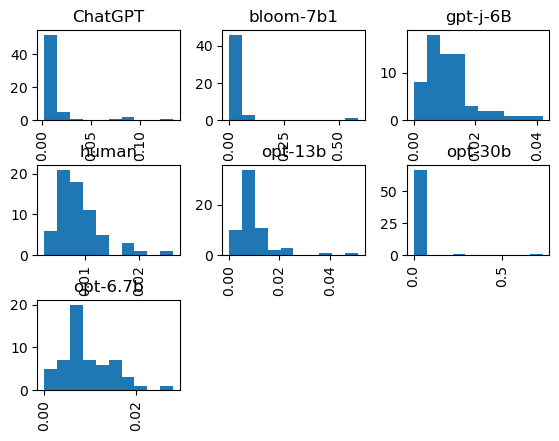

In [49]:
df_q_new_modified.hist("BLEU4", by="model",
                        sharey=False)

In [50]:
s_mean = df_q_new_modified.groupby("model").BLEU4.mean()

In [51]:
s_mean

model
ChatGPT      0.014466
bloom-7b1    0.024887
gpt-j-6B     0.011624
human        0.008574
opt-13b      0.009785
opt-30b      0.024231
opt-6.7b     0.009075
Name: BLEU4, dtype: float64

In [52]:
pd.DataFrame(s_mean).to_csv("/home/pcallec/smoking_cessation_messages/results/processed_qualtrics/bleu4/bleu4_mean.csv")

In [53]:
df_q_new_modified.groupby("model").BLEU4.std()

model
ChatGPT      0.022890
bloom-7b1    0.083994
gpt-j-6B     0.007944
human        0.004242
opt-13b      0.008074
opt-30b      0.091290
opt-6.7b     0.005530
Name: BLEU4, dtype: float64

In [54]:
df_q_new_modified.groupby("model").BLEU4.count()

model
ChatGPT      62
bloom-7b1    50
gpt-j-6B     64
human        66
opt-13b      62
opt-30b      69
opt-6.7b     57
Name: BLEU4, dtype: int64

In [55]:
s_stderror = df_q_new_modified.groupby("model").BLEU4.std()/df_q_new_modified.groupby("model").BLEU4.count()**0.5

In [56]:
s_stderror

model
ChatGPT      0.002907
bloom-7b1    0.011879
gpt-j-6B     0.000993
human        0.000522
opt-13b      0.001025
opt-30b      0.010990
opt-6.7b     0.000732
Name: BLEU4, dtype: float64

In [57]:
pd.DataFrame(s_stderror).to_csv("/home/pcallec/smoking_cessation_messages/results/processed_qualtrics/bleu4/bleu4_stderror.csv")